<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autorch >log.txt

In [2]:
import pandas as pd
import joblib
import autorch
from torch import nn#
from torch.optim import Adam
max_epochs = 100

# c620 模擬數據

dict_keys(['x41', 'case', 'yRefluxRate', 'yControl', 'yHeatDuty', 'vent_gas_x', 'distillate_x', 'sidedraw_x', 'bottoms_x', 'vent_gas_sf', 'distillate_sf', 'sidedraw_sf', 'bottoms_sf', 'density'])


  1%|          | 1/100 [00:00<00:57,  1.71it/s]

epoch:0 train_loss:0.0105 valid_loss:0.0032


 51%|█████     | 51/100 [00:12<00:11,  4.12it/s]

epoch:50 train_loss:0.0033 valid_loss:0.0033


100%|██████████| 100/100 [00:24<00:00,  4.10it/s]


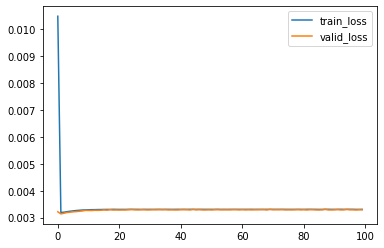

In [3]:
# load data
c620_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c620_train.csv',index_col=0)
c620_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c620_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c620_col_names.pkl')
print(c.keys())
# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c620_df_real[op_col].dropna(axis=1).columns.tolist()
sp_col = c['vent_gas_sf']+c['distillate_sf']+c['sidedraw_sf']+c['bottoms_sf']
n_idx = [[i,i+41,i+41*2,i+41*3] for i in range(41)]

# modeling
c620_model = autorch.utils.PartBulider(c620_df,x_col,sp_col+op_col,limit_y_range=True,normalize_idx_list=n_idx,max_epochs=max_epochs)
c620_model.net = nn.Linear(len(x_col),len(sp_col)+len(op_col))
c620_model.optimizer = Adam(c620_model.net.parameters(),lr=0.01)
c620_model.train()

In [4]:
# test
c620_model.test(e=0.02)

,R2,MSE,MAPE
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Hydrogen_Fraction,0,4.00429e-06,0.0821588
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methane_Fraction,0.971345,5.68752e-07,0.0545575
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethane_Fraction,0.98046,9.60465e-06,0.202798
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Propane_Fraction,0.976917,8.18917e-05,0.61505
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Butane_Fraction,0.912265,0.00137198,3.70008
...,...,...,...
Density_Bottoms Production Rate and Composition,0.997165,4.69708e-11,0.000592057
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.992489,0.967302,0.593325
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0.955631,0.0588988,0.114704
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0.996209,0.00298664,0.0232604


# c620遷移學習

In [5]:
# use pretrain net continue training
from copy import deepcopy
pretrain_net = deepcopy(c620_model.net.train())
print(pretrain_net)

Linear(in_features=44, out_features=172, bias=True)


In [6]:
c620_model = autorch.utils.PartBulider(c620_df_real,x_col,sp_col+op_col,limit_y_range=True,normalize_idx_list=n_idx,max_epochs=max_epochs) # use real data  
c620_model.net = pretrain_net # use pretrain net
c620_model.optimizer = Adam(c620_model.net.parameters())

 55%|█████▌    | 55/100 [00:00<00:00, 264.04it/s]

epoch:0 train_loss:0.0583 valid_loss:0.0518
epoch:50 train_loss:0.0122 valid_loss:0.0121


100%|██████████| 100/100 [00:00<00:00, 271.22it/s]


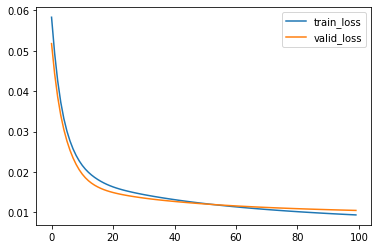

In [7]:
c620_model.train()

In [8]:
# test
c620_model.test(e=0.02)

,R2,MSE,MAPE
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Hydrogen_Fraction,0,7.99713e-05,0.817482
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methane_Fraction,0,0.0127925,11.2152
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethane_Fraction,0,0.164275,40.4735
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Propane_Fraction,0,0.260087,50.9901
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Butane_Fraction,0,0.264126,51.3837
...,...,...,...
Density_Bottoms Production Rate and Composition,0.179422,1.98751e-07,0.0445388
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.461842,11.1134,2.04391
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0.0872912,4.04844,1.03389
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0,0.492499,0.319673


In [9]:
# save
joblib.dump(c620_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_real_data_linear.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_real_data_linear.pkl']

# c660 模擬數據

  1%|          | 1/100 [00:00<00:23,  4.14it/s]

epoch:0 train_loss:0.0215 valid_loss:0.0076


 51%|█████     | 51/100 [00:12<00:11,  4.17it/s]

epoch:50 train_loss:0.0019 valid_loss:0.0019


100%|██████████| 100/100 [00:24<00:00,  4.12it/s]


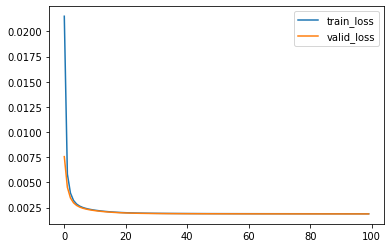

In [16]:
# load data
c660_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c660_train.csv',index_col=0)
c660_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c660_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c660_col_names.pkl')

# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c660_df_real[op_col].dropna(axis=1).columns.tolist()
sp_col = c['vent_gas_sf']+c['distillate_sf']+c['sidedraw_sf']+c['bottoms_sf']
n_idx = [[i,i+41,i+41*2,i+41*3] for i in range(41)]

# modeling
c660_model = autorch.utils.PartBulider(c660_df,x_col,sp_col+op_col,limit_y_range=True,normalize_idx_list=n_idx,max_epochs=max_epochs)
c660_model.net = nn.Linear(len(x_col),len(sp_col)+len(op_col))
c660_model.optimizer = Adam(c660_model.net.parameters())
c660_model.train()

In [17]:
c660_model.test(e=0.02)

,R2,MSE,MAPE
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Hydrogen_Fraction,0,6.42233e-08,0.0143251
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Methane_Fraction,0.670915,0.00555064,7.84055
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Ethane_Fraction,0.90362,0.0063842,14.5303
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Propane_Fraction,0.977361,0.00207664,14.8516
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_n-Butane_Fraction,0.960729,0.00272426,27.2562
...,...,...,...
Density_Bottoms Production Rate and Composition,0.992365,5.85908e-10,0.00213693
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0.952947,39.9957,3.95683
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0.928382,0.00319285,0.053375
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0.897745,0.0818266,0.250801


# c660遷移學習

In [18]:
pretrain_net = deepcopy(c660_model.net.train())
print(pretrain_net)

Linear(in_features=43, out_features=172, bias=True)


In [19]:
c660_model = autorch.utils.PartBulider(c660_df_real,x_col,sp_col+op_col,limit_y_range=True,normalize_idx_list=n_idx,max_epochs=max_epochs) # use real data  
c660_model.net = pretrain_net # use pretrain net
c660_model.optimizer = Adam(c660_model.net.parameters())

 55%|█████▌    | 55/100 [00:00<00:00, 265.43it/s]

epoch:0 train_loss:0.0758 valid_loss:0.0664
epoch:50 train_loss:0.0110 valid_loss:0.0074


100%|██████████| 100/100 [00:00<00:00, 263.33it/s]


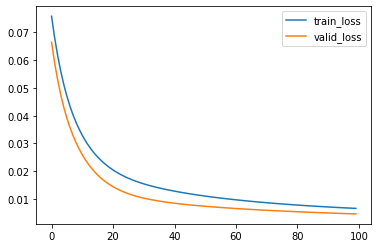

In [20]:
c660_model.train()

In [22]:
# save
joblib.dump(c660_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_real_data_linear.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_real_data_linear.pkl']

# c670 模擬數據

In [23]:
# load data
import numpy as np
c670_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c670_train.csv',index_col=0)
c670_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c670_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c670_col_names.pkl')

In [24]:
# 根據條件修改值
def change_value(df):
  a = df[c['upper_bf']]
  紫色零點零欄位 = a[a==0.0].dropna(axis=1).columns.tolist()
  紫色零點一欄位 = a[a==0.1].dropna(axis=1).columns.tolist()
  紫色零點九欄位 = a[a==0.9].dropna(axis=1).columns.tolist()
  紫色一點零欄位 = a[a==1.0].dropna(axis=1).columns.tolist()
  df.loc[:,紫色零點零欄位] = 0.0001 
  df.loc[:,紫色零點一欄位] = 0.0001 
  df.loc[:,紫色零點九欄位] = 0.9999
  df.loc[:,紫色一點零欄位] = 0.9999
  return df

In [25]:
c670_df = change_value(c670_df)

In [26]:
c670_df_real = change_value(c670_df_real)

In [27]:
x_col = c['combined'] + c['upper_bf']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c670_df_real[op_col].dropna(axis=1).columns.tolist()
sp_col = c['distillate_sf']+c['bottoms_sf']
n_idx = [[i,i+41] for i in range(41)]

  1%|          | 1/100 [00:00<00:22,  4.37it/s]

epoch:0 train_loss:0.0178 valid_loss:0.0048


 51%|█████     | 51/100 [00:12<00:11,  4.21it/s]

epoch:50 train_loss:0.0023 valid_loss:0.0023


100%|██████████| 100/100 [00:23<00:00,  4.19it/s]


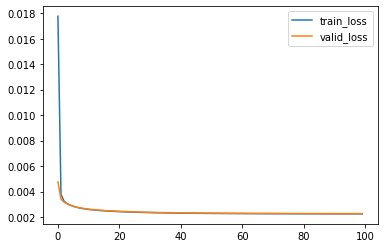

In [28]:
c670_model = autorch.utils.PartBulider(c670_df,x_col,sp_col+op_col,limit_y_range=True,normalize_idx_list=n_idx,max_epochs=max_epochs)
c670_model.net = nn.Linear(len(x_col),len(sp_col)+len(op_col))
c670_model.optimizer = Adam(c670_model.net.parameters())
c670_model.train()

In [29]:
c670_model.test(e=0.02)

,R2,MSE,MAPE
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Hydrogen_Fraction,0,1.2727e-07,0.0300389
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Methane_Fraction,0,1.37774e-07,0.0250942
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Ethane_Fraction,0,1.8177e-08,0.00484534
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Propane_Fraction,0,2.64919e-07,0.0378923
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_n-Butane_Fraction,0,1.59973e-07,0.0325999
...,...,...,...
Density_Bottoms Production Rate and Composition,0.999664,6.03461e-11,0.000722158
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0.990212,5.83265,0.706037
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0.977685,0.00127559,0.0152383
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0.997411,0.00696761,0.0271626


# c670 遷移學習

In [30]:
pretrain_net = deepcopy(c670_model.net.train())
print(pretrain_net)

Linear(in_features=82, out_features=87, bias=True)


In [31]:
c670_model = autorch.utils.PartBulider(c670_df_real,x_col,sp_col+op_col,limit_y_range=True,normalize_idx_list=n_idx,max_epochs=max_epochs) # use real data  
c670_model.net = pretrain_net # use pretrain net
c670_model.optimizer = Adam(c670_model.net.parameters())

 55%|█████▌    | 55/100 [00:00<00:00, 269.03it/s]

epoch:0 train_loss:0.0827 valid_loss:0.0773
epoch:50 train_loss:0.0098 valid_loss:0.0092


100%|██████████| 100/100 [00:00<00:00, 267.76it/s]


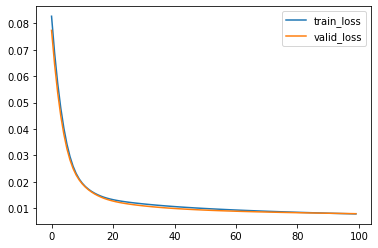

In [32]:
c670_model.train()

In [33]:
c670_model.test(e=0.02)

,R2,MSE,MAPE
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Hydrogen_Fraction,0,1.55482e-06,0.096171
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Methane_Fraction,0,3.08203e-06,0.0946227
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Ethane_Fraction,0,1.05077e-06,0.0511832
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Propane_Fraction,0,1.39151e-05,0.191566
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_n-Butane_Fraction,0,2.87536e-06,0.115124
...,...,...,...
Density_Bottoms Production Rate and Composition,0,1.7835e-06,0.0817273
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0,241.399,3.73033
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0,12.294,0.97286
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0,6.46871,0.606913


In [34]:
joblib.dump(c670_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_real_data_linear.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_real_data_linear.pkl']